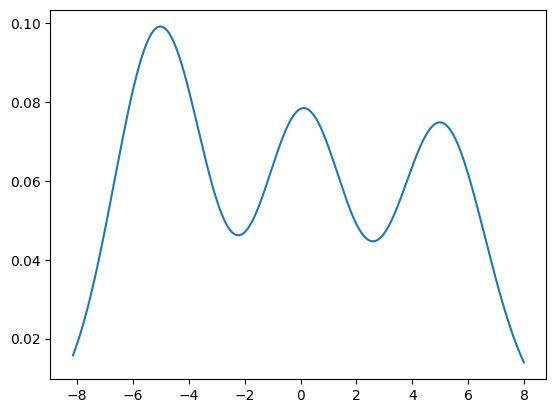

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

clusters = 3
n_cluster = [200, 150, 150]
n_total = sum(n_cluster)
means = [-5, 0, 5]
std_devs = [1, 1, 1]

mix = np.concatenate([np.random.normal(loc=mean, scale=std_dev, size=num) for mean, std_dev, num in zip(means, std_devs, n_cluster)])
kde = gaussian_kde(mix)
x = np.linspace(min(mix), max(mix), 1000)
plt.plot(x, kde(x), label='KDE')

In [14]:
import pymc as pm
import numpy as np
clusters = [2, 3, 4]
models = []
idatas = []
for cluster in clusters:
    with pm.Model() as model:
        weights = pm.Dirichlet("weights", np.ones(cluster))
        means = pm.Normal("means", mu=np.linspace(mix.min(), mix.max(), cluster), sigma=10, shape=cluster)
        std_devs = pm.Uniform("std_devs", lower=0, upper=10, shape=cluster)
        data_likelihood = pm.NormalMixture("data_likelihood", w=weights, mu=means, sigma=std_devs, observed=mix)
        idata = pm.sample(2000, return_inferencedata=True)
        idatas.append(idata)
        models.append(model)


/usr/local/lib/python3.10/dist-packages/arviz/stats/stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


<Axes: title={'center': 'Model comparison\nlower is better'}, xlabel='elpd_loo (deviance)', ylabel='ranked models'>

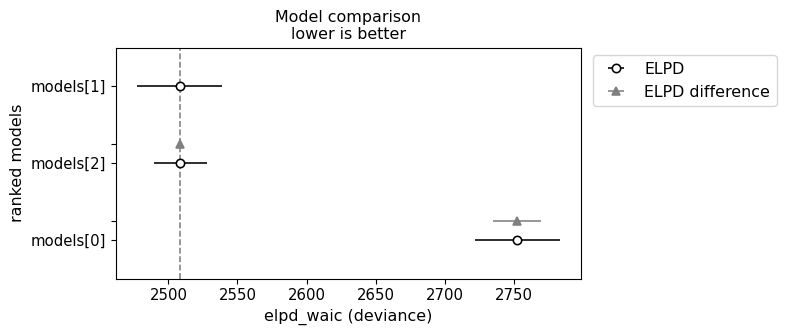

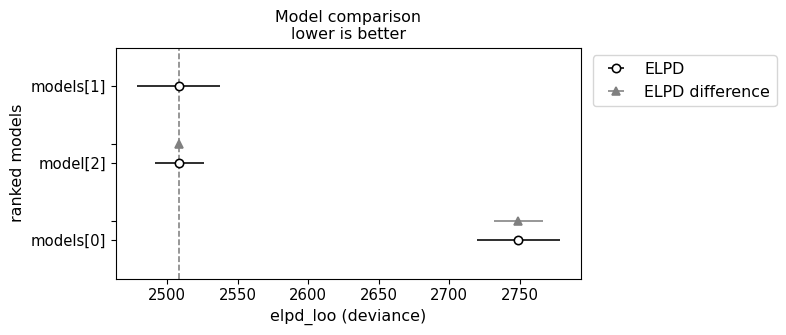

In [39]:
import arviz as az
#for i in range(0, 3):
  #pm.compute_log_likelihood(idatas[i], model=models[i])

az.plot_compare( az.compare({"models[0]": idatas[0], "models[1]": idatas[1], "models[2]": idatas[2]},method="BB-pseudo-BMA",ic="waic",scale="deviance",))
az.plot_compare(az.compare({"models[0]": idatas[0], "models[1]":idatas[1], "model[2]": idatas[2]},method="BB-pseudo-BMA",ic="loo",scale="deviance",))